<a href="https://colab.research.google.com/github/Amanjaiinnn/price-prediction/blob/main/pricepulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from datetime import datetime
import keras
from keras.saving import register_keras_serializable



In [ ]:
raw_data = pd.read_csv('complete_data.csv',parse_dates = ["Date"],
                 index_col = ["Date"])
raw_data.head()

,Arrival Quantity,Retail Prices,Min Price,Max Price,Modal Price
Date,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN
2002-01-02,NaN,NaN,NaN,NaN,NaN
2002-01-03,NaN,NaN,NaN,NaN,NaN
2002-01-04,84.0,0.0,325.0,375.0,350.0
2002-01-05,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_data.isnull().sum()

,0
Arrival Quantity,2392
Retail Prices,2392
Min Price,2392
Max Price,2392
Modal Price,2392


In [ ]:
data = raw_data.dropna(axis = 0)
data.isnull().sum()

,0
Arrival Quantity,0
Retail Prices,0
Min Price,0
Max Price,0
Modal Price,0


In [ ]:
data.head()

,Arrival Quantity,Retail Prices,Min Price,Max Price,Modal Price
Date,,,,,
2002-01-04,84.0,0.0,325.0,375.0,350.0
2002-01-07,388.0,0.0,350.0,412.0,375.0
2002-01-08,1766.0,0.0,375.0,431.0,418.0
2002-01-09,1172.0,0.0,400.0,431.0,425.0
2002-01-11,1620.0,0.0,300.0,375.0,362.0


In [ ]:
data = data.drop(['Retail Prices','Min Price', 'Max Price','Arrival Quantity'],axis = 1)

In [ ]:
data.head()

,Modal Price
Date,
2002-01-04,350.0
2002-01-07,375.0
2002-01-08,418.0
2002-01-09,425.0
2002-01-11,362.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4614 entries, 2002-01-04 to 2021-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Modal Price  4614 non-null   float64
dtypes: float64(1)
memory usage: 72.1 KB


In [ ]:
data.to_csv('file1.csv')

In [ ]:
# only want closing price data for prediction

df = pd.DataFrame(data["Modal Price"]).rename(columns={"Modal Price": "price"})
df.head()

,price
Date,
2002-01-04,350.0
2002-01-07,375.0
2002-01-08,418.0
2002-01-09,425.0
2002-01-11,362.0


In [ ]:
#Reading csv file with python
import csv
from datetime import datetime

timesteps = []
price = []
with open("/content/file1.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    price.append(line[1]) # get the closing price as float

# View first 10 of each
timesteps[:10], price[:10]

([datetime.datetime(2002, 1, 4, 0, 0),
  datetime.datetime(2002, 1, 7, 0, 0),
  datetime.datetime(2002, 1, 8, 0, 0),
  datetime.datetime(2002, 1, 9, 0, 0),
  datetime.datetime(2002, 1, 11, 0, 0),
  datetime.datetime(2002, 1, 14, 0, 0),
  datetime.datetime(2002, 1, 15, 0, 0),
  datetime.datetime(2002, 1, 16, 0, 0),
  datetime.datetime(2002, 1, 18, 0, 0),
  datetime.datetime(2002, 1, 21, 0, 0)],
 ['350.0',
  '375.0',
  '418.0',
  '425.0',
  '362.0',
  '362.0',
  '406.0',
  '400.0',
  '400.0',
  '275.0'])

In [ ]:
timesteps[:10]

[datetime.datetime(2002, 1, 4, 0, 0),
 datetime.datetime(2002, 1, 7, 0, 0),
 datetime.datetime(2002, 1, 8, 0, 0),
 datetime.datetime(2002, 1, 9, 0, 0),
 datetime.datetime(2002, 1, 11, 0, 0),
 datetime.datetime(2002, 1, 14, 0, 0),
 datetime.datetime(2002, 1, 15, 0, 0),
 datetime.datetime(2002, 1, 16, 0, 0),
 datetime.datetime(2002, 1, 18, 0, 0),
 datetime.datetime(2002, 1, 21, 0, 0)]

In [ ]:
data.head()

,Modal Price
Date,
2002-01-04,350.0
2002-01-07,375.0
2002-01-08,418.0
2002-01-09,425.0
2002-01-11,362.0


In [ ]:
# Get bitcoin data array
timesteps = df.index.to_numpy()
price= df["price"].to_numpy()


In [ ]:
split_size = int(0.8*len(price))

# Create train data splits
x_train,y_train = timesteps[:split_size],price[:split_size]

x_test,y_test = timesteps[split_size:],price[split_size:]

len(x_train),len(x_test),len(y_train),len(y_test)

(3691, 923, 3691, 923)

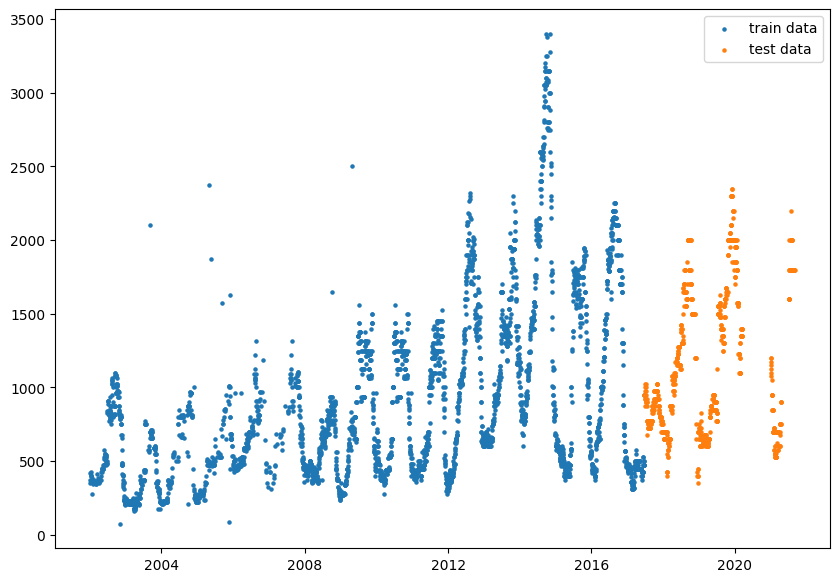

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "train data")
plt.scatter(x_test,y_test,s = 5,label = "test data")
plt.legend()


In [ ]:
WINDOW_SIZE =7
HORIZON = 1

In [ ]:
# Create function to label window data
def labelled_window(x,horizon = HORIZON):
  """
  if horizon = 1
  input: [0,1,2,3,4,5,6,7] -> output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:,:-horizon],x[:,-horizon:] # this is for 2d For 1d just get rid of ummm uk how to do it


In [ ]:
def make_windows(x,window_size = 7,horizon = 1):
  #1. Create a window of specific window_size (add the horizon at last for labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)

  #2. Create a 2D array of multiple window steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T

  #3. Index on the target array with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  #4. Get labelled windows
  windows,labels = labelled_window(windowed_array,horizon = horizon)

  return windows,labels

In [ ]:
full_windows,full_labels = make_windows(price,window_size = WINDOW_SIZE,horizon = HORIZON)
len(full_windows),len(full_labels)

(4607, 4607)

In [ ]:
def make_train_test_split(windows,labels,test_spit = 0.2):
  split_size = int((1-test_spit)*len(windows)) #80%

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [ ]:
train_windows, test_windows,train_labels,test_labels = make_train_test_split(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(3685, 922, 3685, 922)

In [ ]:
price_nbeats = data.copy()
for i in range(WINDOW_SIZE):
  price_nbeats[f"Prices+{i+1}"] = price_nbeats["Modal Price"].shift(periods = i+1)
price_nbeats.dropna().head()

,Modal Price,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2002-01-16,400.0,406.0,362.0,362.0,425.0,418.0,375.0,350.0
2002-01-18,400.0,400.0,406.0,362.0,362.0,425.0,418.0,375.0
2002-01-21,275.0,400.0,400.0,406.0,362.0,362.0,425.0,418.0
2002-01-22,362.0,275.0,400.0,400.0,406.0,362.0,362.0,425.0
2002-01-23,362.0,362.0,275.0,400.0,400.0,406.0,362.0,362.0


In [ ]:
# Making Feature and labels and splitting them in train and test
x = price_nbeats.dropna().drop("Modal Price",axis = 1)
y = price_nbeats.dropna()["Modal Price"]

split_size = int(0.8*len(y))
x_train_nbeats,y_train_nbeats = x[:split_size],y[:split_size]
x_test_nbeats,y_test_nbeats = x[split_size:],y[split_size:]

len(x_train_nbeats),len(y_train_nbeats),len(x_test_nbeats),len(y_test_nbeats)


(3685, 3685, 922, 922)

In [ ]:
x_train_nbeats[:10]

,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,
2002-01-16,406.0,362.0,362.0,425.0,418.0,375.0,350.0
2002-01-18,400.0,406.0,362.0,362.0,425.0,418.0,375.0
2002-01-21,400.0,400.0,406.0,362.0,362.0,425.0,418.0
2002-01-22,275.0,400.0,400.0,406.0,362.0,362.0,425.0
2002-01-23,362.0,275.0,400.0,400.0,406.0,362.0,362.0
2002-01-25,362.0,362.0,275.0,400.0,400.0,406.0,362.0
2002-01-31,387.0,362.0,362.0,275.0,400.0,400.0,406.0
2002-02-01,362.0,387.0,362.0,362.0,275.0,400.0,400.0
2002-02-04,343.0,362.0,387.0,362.0,362.0,275.0,400.0


In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train_nbeats)
train_label_dataset = tf.data.Dataset.from_tensor_slices(y_train_nbeats)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test_nbeats)
test_label_dataset = tf.data.Dataset.from_tensor_slices(y_test_nbeats)

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_label_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_label_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from papers
N_EPOCHS = 1000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE  #lookback period in paper
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

In [ ]:
# Create NBeatsBlock Custom layer
@register_keras_serializable()

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the kwargs takes care for the parent class
    super().__init__(**kwargs)
    self.input_size = input_size # These are all in the fig 1 of the page which im trying to recreate
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layer and has RELU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons,activation = "relu") for _ in range (n_layers)] # _ cause we dont need the variable

    # output of block is theta layer with linear activation (in paper)
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation = "linear",name = "theta")

  def call(self,inputs):
    x = inputs
    for layers in self.hidden:
      # x is passed sequentially through each hiddeln layer in self.hiddenlayer as there is 4 FC layer
      x = layers(x)
    #After processing all the hidden layer it passed through theta_layer (see figure)
    theta = self.theta_layer(x)
    # in theta layer there is backcast and forecast so split htose
    backcast,forecast = theta[:, :self.input_size],theta[:, -self.horizon:]

    return backcast,forecast
  def get_config(self):
      config = super(NBeatsBlock, self).get_config()
      config.update({
            'input_size': self.input_size,
            'theta_size': self.theta_size,
            'horizon': self.horizon,
            'n_neurons': self.n_neurons,
            'n_layers': self.n_layers,
        })
      return config



In [ ]:
%%time

tf.random.set_seed(42)

#1.Setup an instrance of NBeats
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon  =HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')

#2.Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE,),name = "stack_input")

#3. Initital backcast and forecast input
residuals,forecast = nbeats_block_layer(stack_input) # residuals is the initial backcast

#4. Create stacks of blocks
for i,_ in enumerate(range(N_STACKS-1)):
  #5. Using the NBeatsBLock to calculate backcast as well as forecast
  backcast,block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon  =HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                  name = f"NBeatsBlock_{i}")(residuals)

#6. Create the double residual stacking using subtract and add layers
  residuals = layers.subtract([residuals,backcast],name = f"subtract_{i}")
  forecast = layers.add([forecast,block_forecast],name = f"add_{i}")

#7. Put together the input and output
model_7 = tf.keras.Model(inputs = stack_input,outputs = forecast,name = "model_7_nbeats")

#8. Compile the model
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

#9. Fit the model
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss", #if the model doesnt perform well till 200 epochs it will stop this and restore best weights
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                              patience = 100,
                                                              verbose = 1)]
                        # if the model doesn't improve for 100 epochs straight,it will reduce the lr by 0.1 i.e lrX0.1 and output everytime it reduces the learning_rate
            )



Epoch 251: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 387: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 927: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 34s, sys: 8.19 s, total: 5min 42s
Wall time: 6min 16s


In [ ]:
model_7.summary()

Model: "model_7_nbeats"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ stack_input (InputLayer)  │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ InitialBlock              │ [(None, 7), (None, 1)] │        796,168 │ stack_input[0][0]      │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_0             │ [(None, 7), (None, 1)] │        796,168 │ InitialBlock[0][0]     │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_0 (Subtract)     │ (None, 7)              │              0 │ InitialBlock[0][0],    │
│                           │                        │                │ NBeatsBlock_0[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_1             │ [(None, 7), (None, 1)] │        796,168 │ subtract_0[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_1 (Subtract)     │ (None, 7)              │              0 │ subtract_0[0][0],      │
│                           │                        │                │ NBeatsBlock_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_2             │ [(None, 7), (None, 1)] │        796,168 │ subtract_1[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_2 (Subtract)     │ (None, 7)              │              0 │ subtract_1[0][0],      │
│                           │                        │                │ NBeatsBlock_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_3             │ [(None, 7), (None, 1)] │        796,168 │ subtract_2[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_3 (Subtract)     │ (None, 7)              │              0 │ subtract_2[0][0],      │
│                           │                        │                │ NBeatsBlock_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_4             │ [(None, 7), (None, 1)] │        796,168 │ subtract_3[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_4 (Subtract)     │ (None, 7)              │              0 │ subtract_3[0][0],      │
│                           │                        │                │ NBeatsBlock_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_5             │ [(None, 7), (None, 1)] │        796,168 │ subtract_4[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_5 (Subtract)

 Total params: 71,655,122 (273.34 MB)

 Trainable params: 23,885,040 (91.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,770,082 (182.23 MB)

In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 28.0372


28.03724479675293

In [ ]:
# Function for predictions for all models
def make_pred(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_7_preds = make_pred(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 857.9096 ,  925.53076,  924.33264, 1042.607  , 1021.82825,
        976.46906,  880.0802 ,  921.6874 ,  922.6618 , 1024.1467 ],
      dtype=float32)>

In [ ]:
model_7_preds.shape

TensorShape([922])

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel(" Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


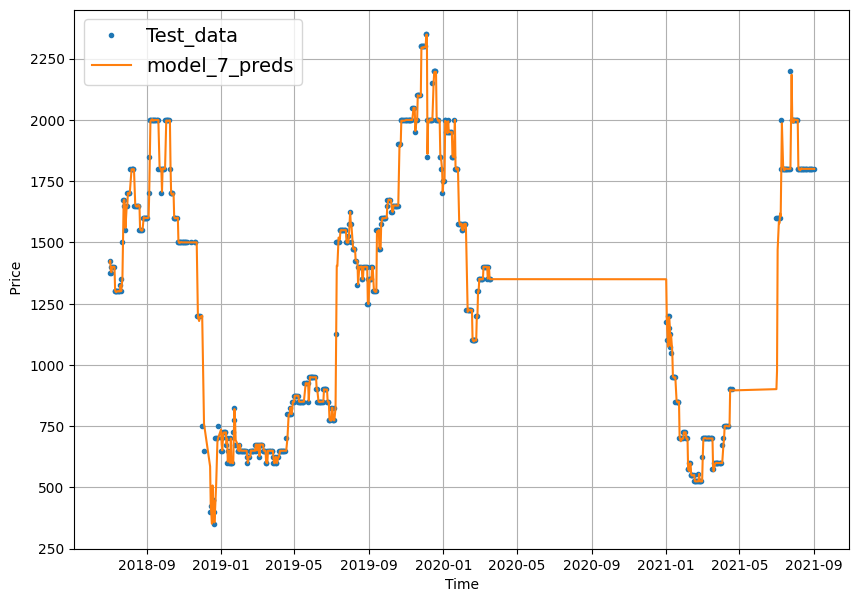

In [ ]:

offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_7_preds, start=offset, format="-", label="model_7_preds")


In [ ]:
import pickle

In [ ]:
filename = "pricepulse.sav"
pickle.dump(model_7, open(filename, 'wb') )


In [ ]:
model_7.save('pricepulse.keras')

## Full Future

In [ ]:
x_all = price_nbeats.drop(["Modal Price"],axis = 1).dropna().to_numpy()
y_all = price_nbeats.dropna()["Modal Price"].to_numpy()


In [ ]:
feature_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((feature_dataset_all,labels_dataset_all))

batch_size = 1024
dataset_all = dataset_all.batch(batch_size).prefetch(tf.data.AUTOTUNE)
dataset_all



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
%%time

tf.random.set_seed(42)

#1.Setup an instrance of NBeats
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon  =HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')

#2.Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE,),name = "stack_input")

#3. Initital backcast and forecast input
residuals,forecast = nbeats_block_layer(stack_input) # residuals is the initial backcast

#4. Create stacks of blocks
for i,_ in enumerate(range(N_STACKS-1)):
  #5. Using the NBeatsBLock to calculate backcast as well as forecast
  backcast,block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon  =HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                  name = f"NBeatsBlock_{i}")(residuals)

#6. Create the double residual stacking using subtract and add layers
  residuals = layers.subtract([residuals,backcast],name = f"subtract_{i}")
  forecast = layers.add([forecast,block_forecast],name = f"add_{i}")

#7. Put together the input and output
model_7 = tf.keras.Model(inputs = stack_input,outputs = forecast,name = "model_7_nbeats")

#8. Compile the model
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

#9. Fit the model
model_7.fit(dataset_all,
            epochs = N_EPOCHS,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss", #if the model doesnt perform well till 200 epochs it will stop this and restore best weights
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                              patience = 100,
                                                              verbose = 1)]
                        # if the model doesn't improve for 100 epochs straight,it will reduce the lr by 0.1 i.e lrX0.1 and output everytime it reduces the learning_rate
            )


CPU times: user 5min 48s, sys: 3.15 s, total: 5min 51s
Wall time: 6min 4s


In [ ]:
INTO_FUTURE = 30

In [ ]:
def make_future_forecast(values,model,into_future,window_size = WINDOW_SIZE):
  # Empty list for future forecast and prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):
    # Making prediction on the last window
    future_pred = model.predict(tf.expand_dims(last_window,axis = 0))
    print(f"Predicting on: \n{last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Append prediction to last_window
    last_window = np.append(last_window,future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values = y_all,
                                       model = model_7,
                                       into_future = INTO_FUTURE,
                                       window_size = WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicting on: 
[1800. 1800. 1800. 1800. 1800. 1800. 1800.] -> Prediction: 1810.014404296875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicting on: 
[1800.        1800.        1800.        1800.        1800.
 1800.        1810.0144043] -> Prediction: 1809.8453369140625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicting on: 
[1800.         1800.         1800.         1800.         1800.
 1810.0144043  1809.84533691] -> Prediction: 1810.094482421875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicting on: 
[1800.         1800.         1800.         1800.         1810.0144043
 1809.84533691 1810.09448242] -> Prediction: 1810.119384765625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicting on: 
[1800.         1800.         1800.         1810.0144043  1809.84533691
 1810.09448242 1810.11938477] -> Prediction: 1810.2373046875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicting on: 
[1800.         1800.         1810.0144043  1809.84533691 1810.09448242
 1810.1193847

In [ ]:
model_7.save('pricepulseFinal.keras')

In [ ]:
filename = "pricepulseFinal.sav"
pickle.dump(model_7, open(filename, 'wb') )

In [ ]:
from  import NBeatsBlock  # Adjust to your actual module name

loaded_model = tf.keras.models.load_model('my_model.h5')